# Compare our values to Nirody et al. 2021
<br>
This notebook = speed vs. step parameters <br>
  ... in Nirody this is:<br>

### Figure 2
### Figure 3
### Figure S1
### Figure S5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import gaitFunctions
import plotClip
from scipy import stats
import seaborn as sns

In [2]:
# navigate to directory that contains the data
os.chdir('/Users/iwoods/OneDrive - Ithaca College/movement_disorder_paper_2023/videos_exemplaris/analyses_summaries/')
for f in sorted(glob.glob('*.xlsx')):
    print(f)

all_exemplaris_through_9Nov23_combined.xlsx
iw_9Nov23_exemplaris_inverted_combined.xlsx


In [3]:
# specify the data file
data_file = 'iw_9Nov23_exemplaris_inverted_combined.xlsx'

# Nirody Figure 2

n =  1149 strides are shown
ρ = 1.0 p = 0.0


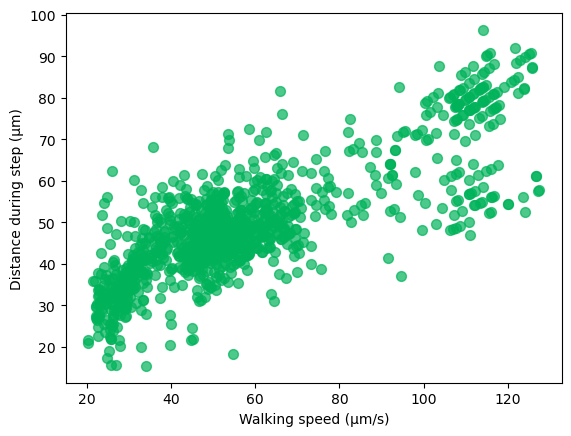

In [4]:
'''
Figure 2A
walking speed vs. step amplitude

Paper text:
"Step amplitude, defined as the distance between the posterior extreme position (PEP) 
measured at liftoff of a leg at the start of a swing and the anterior extreme position 
(AEP) measured at touchdown of the same leg at the end of swing, increases with forward 
walking speed (Fig. 2A)."

Figure legend:
"Stride length (A) smoothly increases ... with walking speed"

Methods:
"Correlation coefficients between variables were calculated over the entire observed 
walking speed range; we used Spearman ρ to determine correlation due to the nonlinear 
relationships between several of our kinematic variables."

NOTES:  
1. I am only including data when the tardigrades are 'cruising' = not in a stop or a 
turn . . .

2. We define step distance differently = distance traveled by tardigrade during gait cycle.
So this is always going to be correlated to speed. Consider measuring amplitudes . . . 
(lots of re-stepping work)


'''

# load the step_timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)

speed_during_steps_scaled = step_df['speed_during_step_scaled'].values * 1000
distance_during_steps_scaled = step_df['distance_during_step_scaled'].values * 1000
marker_color = '#00b35a'

plt.scatter(speed_during_steps_scaled,distance_during_steps_scaled,c=marker_color,s=50,alpha=0.7)
plt.ylabel('Distance during step (µm)')
plt.xlabel('Walking speed (µm/s)')
print('n = ', len(speed_during_steps_scaled), 'strides are shown')

r,p = stats.spearmanr(speed_during_steps_scaled,speed_during_steps_scaled)
print('ρ =', np.round(r,2), 'p =', np.round(p,2))

plt.show()

n =  1149 strides are shown
ρ = -0.81 p = 0.0


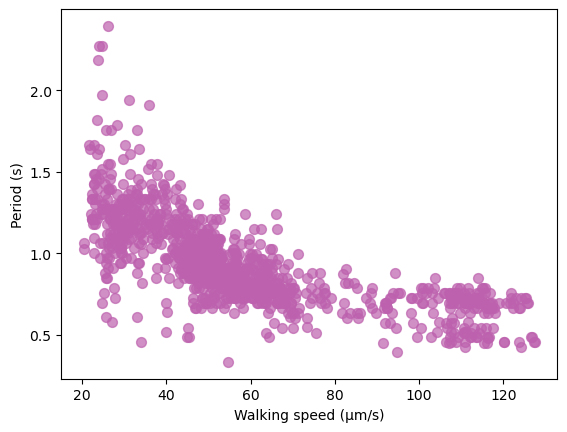

In [5]:
'''
Figure 2B
Forward walking speed vs. Stride period (gait cycle)

"Stride period decreases with walking speed, plateauing at walking speeds of 
approximately v > 100 μm/s (Fig. 2B)."
'''

# load the step_timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)

speed_during_steps_scaled = step_df['speed_during_step_scaled'].values * 1000
gait_cycles = step_df['gait'].values
marker_color = '#bd61ae'

plt.scatter(speed_during_steps_scaled,gait_cycles,c=marker_color,s=50,alpha=0.7)
plt.ylabel('Period (s)')
plt.xlabel('Walking speed (µm/s)')
print('n = ', len(speed_during_steps_scaled), 'strides are shown')

r,p = stats.spearmanr(speed_during_steps_scaled,gait_cycles)
print('ρ =', np.round(r,2), 'p =', np.round(p,2))

plt.show()

n =  1149 strides are shown
Swing: ρ = -0.29 p = 0.0
Stance: ρ = -0.72 p = 0.0


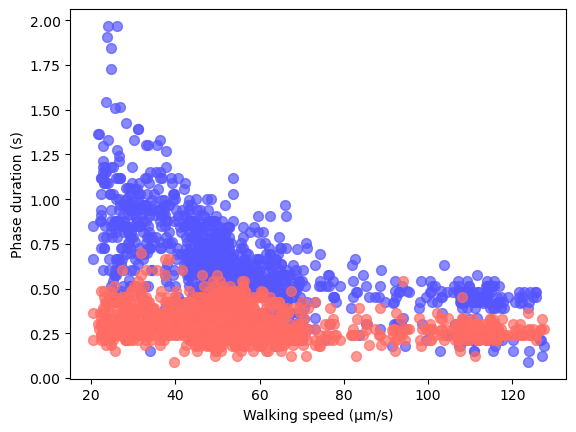

In [6]:
'''
Figure 2C
walking speed vs. stance and swing duration

"As speed increases, stance duration is modulated strongly while swing 
duration remains relatively constant (Fig. 2C). 

Both stance duration and stride period show a hyperbolic relationship 
with speed, as observed in insects [Drosophila (13), stick insect Carausius 
morosus (29), and desert ant Cataglyphyis fortis (30)]. In line with studies 
in arthropods, we find that swing duration is coordinated with stride period 
(ρ = 0.54, P < 0.001)."
'''

# load the step_timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)

speed_during_steps_scaled = step_df['speed_during_step_scaled'].values * 1000
stance_durations = step_df['stance'].values
swing_durations = step_df['swing'].values
stance_color = '#5656ff'
swing_color = '#ff6c64'

plt.scatter(speed_during_steps_scaled,stance_durations,c=stance_color,s=50,alpha=0.7)
plt.scatter(speed_during_steps_scaled,swing_durations,c=swing_color,s=50,alpha=0.7)
plt.ylabel('Phase duration (s)')
plt.xlabel('Walking speed (µm/s)')
print('n = ', len(speed_during_steps_scaled), 'strides are shown')

r,p = stats.spearmanr(speed_during_steps_scaled,swing_durations)
print('Swing: ρ =', np.round(r,2), 'p =', np.round(p,2))

r,p = stats.spearmanr(speed_during_steps_scaled,stance_durations)
print('Stance: ρ =', np.round(r,2), 'p =', np.round(p,2))

plt.show()

# Nirody Figure 3

n =  1149 strides are shown
Duty Factor: ρ = -0.41 p = 0.0


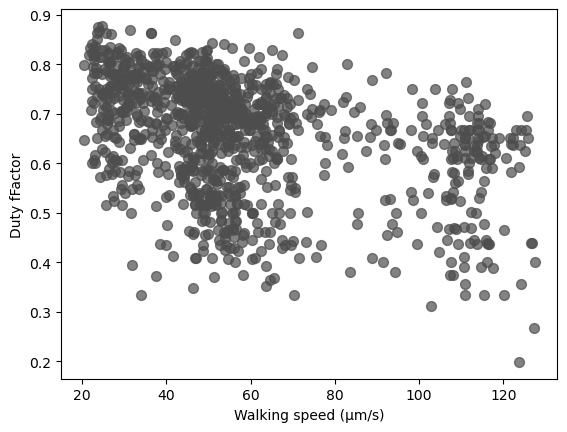

In [7]:
'''
Figure 3
Walking Speed vs. duty factor

"Tardigrades maintain a relatively constant duty factor across all 
observed forward walking speeds; we find a weak negative correlation
between duty factor and walking speed (ρ = −0.33, P < 0.001)"
'''

# load the step_timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)

speed_during_steps_scaled = step_df['speed_during_step_scaled'].values * 1000
duty_factor = step_df['duty'].values
marker_color = '#4d4d4d'

plt.scatter(speed_during_steps_scaled,duty_factor,c=marker_color,s=50,alpha=0.7)
plt.ylabel('Duty fFactor')
plt.xlabel('Walking speed (µm/s)')
print('n = ', len(speed_during_steps_scaled), 'strides are shown')

r,p = stats.spearmanr(speed_during_steps_scaled,duty_factor)
print('Duty Factor: ρ =', np.round(r,2), 'p =', np.round(p,2))

plt.show()

# Nirody Figure S1

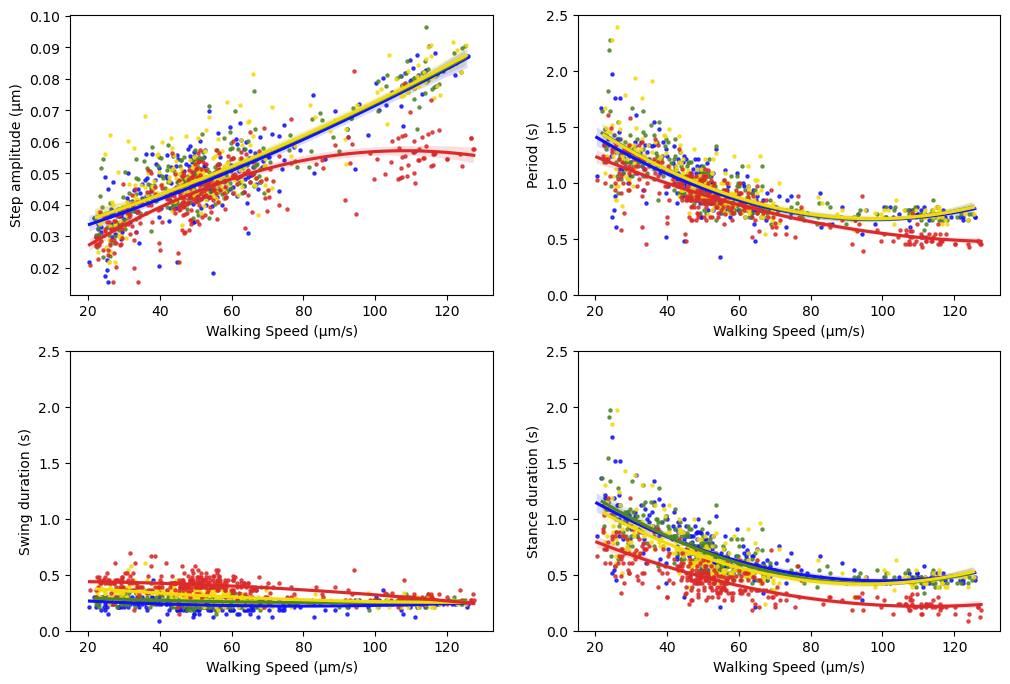

In [8]:
leg_pairs = [['L1','R1'],['L2','R2'],['L3','R3'],['L4','R4']]
pair_colors = ['#1212fa','#4e8626','#f5da0a','#db2a29']
data_desciptions = ['Step amplitude (µm)','Period (s)','Swing duration (s)','Stance duration (s)']
data_cols = ['distance_during_step_scaled','gait','swing','stance']
speed_col = 'speed_during_step_scaled'

# load the step_timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)

# set up plot
f, axes = plt.subplots(2,2,figsize=(12,8))
ax_handles = axes.reshape(1,4)[0]
for i, d in enumerate(data_desciptions):
    ax = ax_handles[i]
    for j, leg_pair in enumerate(leg_pairs):
        
        # get data for this pair for this datatype
        pair_data = step_df.copy()[step_df['legID'].isin(leg_pair)]
        pair_data[speed_col] = pair_data[speed_col].values * 1000 # convert to µm

        # scatter and regression line ... not so nice b/c cannot figure out fit
#         x_data = pair_data[speed_col].values * 1000
#         y_data = pair_data[data_cols[i]].values 
#         coefficients = np.polyfit(x_data, y_data, 2)
#         fitted_data = np.sort(np.polyval(coefficients, x_data))
#         if d in ['Period (s)','Swing duration (s)','Stance duration (s)']:
#             fitted_data = np.flip(fitted_data)
#         # scatter
#         ax.scatter(x_data,y_data,s=5,c=pair_colors[j],alpha=0.7)
#         # add fit line
#         ax.plot(np.linspace(0, np.max(x_data), len(x_data)),fitted_data,color=pair_colors[j], linewidth=2)
        
        # scatter plot and regression line from seaborn
        xcol = speed_col
        ycol = data_cols[i]
        sns.regplot(data=pair_data, x=xcol, y=ycol, ax=ax, 
                    scatter_kws ={'s':5}, color=pair_colors[j], order=2) # lowess=True
        
    ax.set_ylabel(d)
    ax.set_xlabel('Walking Speed (µm/s)')
    if d in ['Period (s)','Swing duration (s)','Stance duration (s)']:
        ax.set_ylim([0,2.5])

plt.show()

# Nirody Figure S5

#### Version 1 = as in paper (4 gait categories: unclassified, pentapod, tetrapod, tripod)
#### Version 2 = all gait categories for lateral legs
#### Version 3 = all gait categories for rear legs

In [ ]:
'''
LEFT: does gait choice dictate speed?
RIGHT: does speed dictate gait choice

should add these two plots to plotClips.py

To get data:
For each gait style, make array of SPEEDs at that choice
... may need to add this to combineClips
... and then load into a dictionary (keyed by gait style)

combineClips: make a new sheet? 
    Option ONE:
        Columns = gait styles
        Rows = observed speeds for each gait style
        (lose individual variation this way ... but is that a problem?)

    Option TWO:
        keep all gait style frame speeds for all individuals, then parse that
        
analyzeSteps: 
    DONE to gait_styles sheet, add columns for speed (mm/s and bodylength/s) for each frame?
    then can just pull out slices during combineClips and add that to big table for OPTION TWO above.

'''